In [1]:
import time
import requests
import pandas as pd 
import json
from pandas.io.json import json_normalize
import seaborn as sns
import scipy.stats as stats
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
sns.set()
from sklearn.cluster import KMeans
from statistics import mean


# Teams Stats 2020

### Touchdowns

In [2]:
api_prefix = "https://api.sportsdata.io/v3/nfl/scores"
df_td20 = pd.DataFrame()
headers = {'Ocp-Apim-Subscription-Key': '6b6d75c076c34e1d89c02554860f9e68'}
resp = requests.get(
    api_prefix + "/json/TeamSeasonStats/2020REG",
    params={
        "season": "2020REG"
    },headers=headers
)

resp_obj = resp.json()
df_td20 = pd.DataFrame(resp_obj, columns=["Team",'Touchdowns', 'PassingTouchdowns', 'RushingTouchdowns', 'OpponentTouchdowns', 'OpponentPassingTouchdowns', 'OpponentRushingTouchdowns'])
df_td20.head()




,Team,Touchdowns,PassingTouchdowns,RushingTouchdowns,OpponentTouchdowns,OpponentPassingTouchdowns,OpponentRushingTouchdowns
0,ARI,23,13,10,20,12,3
1,ATL,19,13,3,23,16,3
2,BAL,26,13,11,18,10,3
3,BUF,28,19,4,21,11,5
4,CAR,18,4,4,22,13,4


### Team Stats

In [3]:
api_prefix = "https://api.sportsdata.io/v3/nfl/scores"
df_tstat20 = pd.DataFrame()
headers = {'Ocp-Apim-Subscription-Key': '6b6d75c076c34e1d89c02554860f9e68'}
resp = requests.get(
    api_prefix + "/json/TeamSeasonStats/2020REG",
    params={
        "season": "2020REG"
    },headers=headers
)

resp_obj = resp.json()
df_tstat20 = pd.DataFrame(resp_obj, columns=['Team', "RushingAttempts", 'PasserRating', 'Penalties', 
                                             'QuarterbackHits', 'Giveaways', 'Takeaways',  
                                             'TurnoverDifferential', 'TimeOfPossession'])
df_tstat20.head()

,Team,RushingAttempts,PasserRating,Penalties,QuarterbackHits,Giveaways,Takeaways,TurnoverDifferential,TimeOfPossession
0,ARI,228,44.1,54,50,5,5,0,29:04
1,ATL,194,43.8,39,44,4,5,1,31:42
2,BAL,264,44.6,49,57,4,10,1,32:30
3,BUF,195,50.5,48,46,10,12,1,32:45
4,CAR,193,40.7,45,43,5,10,0,31:59


### Team W/L 

In [4]:
api_prefix = "https://api.sportsdata.io/v3/nfl/scores"
df_20wl = pd.DataFrame()
headers = {'Ocp-Apim-Subscription-Key': '6b6d75c076c34e1d89c02554860f9e68'}
resp = requests.get(
    api_prefix + "/json/Standings/2020REG",
    params={
        "season": "2020REG"
    },headers=headers
)

resp_obj = resp.json()
df_20wl = pd.DataFrame(resp_obj, columns=["Team", 'Wins', 'Losses', 'Percentage', "PointsFor" ,"PointsAgainst" ,"NetPoints"])
df_20wl



,Team,Wins,Losses,Percentage,PointsFor,PointsAgainst,NetPoints
0,BUF,13,3,0.813,501,375,126
1,MIA,10,6,0.625,404,338,66
2,NE,7,9,0.438,326,353,-27
3,NYJ,2,14,0.125,243,457,-214
4,PIT,12,4,0.750,416,312,104
5,BAL,11,5,0.688,468,303,165
6,CLE,11,5,0.688,408,419,-11
7,CIN,4,11,0.281,311,424,-113
8,IND,11,5,0.688,451,362,89
9,TEN,11,5,0.688,491,439,52


In [5]:
type(df_20wl)

pandas.core.frame.DataFrame

# Combine Stats 2020 

In [6]:
stats2020= df_20wl.set_index('Team').combine_first(df_td20.set_index('Team')).reset_index()

In [7]:
stats2020.head()

,Team,Losses,NetPoints,OpponentPassingTouchdowns,OpponentRushingTouchdowns,OpponentTouchdowns,PassingTouchdowns,Percentage,PointsAgainst,PointsFor,RushingTouchdowns,Touchdowns,Wins
0,ARI,8,43,12.0,3.0,20.0,13.0,0.500,367,410,10.0,23.0,8
1,ATL,12,-18,16.0,3.0,23.0,13.0,0.250,414,396,3.0,19.0,4
2,BAL,5,165,10.0,3.0,18.0,13.0,0.688,303,468,11.0,26.0,11
3,BUF,3,126,11.0,5.0,21.0,19.0,0.813,375,501,4.0,28.0,13
4,CAR,11,-52,13.0,4.0,22.0,4.0,0.313,402,350,4.0,18.0,5


In [8]:
stats2020 = stats2020.set_index('Team').combine_first(df_tstat20.set_index('Team')).reset_index()

In [9]:
stats2020

,Team,Giveaways,Losses,NetPoints,OpponentPassingTouchdowns,OpponentRushingTouchdowns,OpponentTouchdowns,PasserRating,PassingTouchdowns,Penalties,...,PointsAgainst,PointsFor,QuarterbackHits,RushingAttempts,RushingTouchdowns,Takeaways,TimeOfPossession,Touchdowns,TurnoverDifferential,Wins
0,ARI,5.0,8,43,12.0,3.0,20.0,44.1,13.0,54.0,...,367,410,50.0,228.0,10.0,5.0,29:04,23.0,0.0,8
1,ATL,4.0,12,-18,16.0,3.0,23.0,43.8,13.0,39.0,...,414,396,44.0,194.0,3.0,5.0,31:42,19.0,1.0,4
2,BAL,4.0,5,165,10.0,3.0,18.0,44.6,13.0,49.0,...,303,468,57.0,264.0,11.0,10.0,32:30,26.0,1.0,11
3,BUF,10.0,3,126,11.0,5.0,21.0,50.5,19.0,48.0,...,375,501,46.0,195.0,4.0,12.0,32:45,28.0,1.0,13
4,CAR,5.0,11,-52,13.0,4.0,22.0,40.7,4.0,45.0,...,402,350,43.0,193.0,4.0,10.0,31:59,18.0,0.0,5
5,CHI,10.0,8,2,13.0,2.0,19.0,40.2,12.0,42.0,...,370,372,43.0,187.0,3.0,4.0,30:28,19.0,-2.0,8
6,CIN,11.0,11,-113,15.0,3.0,22.0,39.5,4.0,39.0,...,424,311,34.0,195.0,3.0,4.0,31:09,16.0,-3.0,4
7,CLE,4.0,5,-11,15.0,4.0,24.0,45.2,13.0,48.0,...,419,408,38.0,235.0,5.0,5.0,31:54,24.0,1.0,11
8,DAL,12.0,10,-78,16.0,5.0,27.0,41.6,12.0,46.0,...,473,395,38.0,204.0,3.0,11.0,28:22,20.0,-1.0,6
9,DEN,15.0,11,-123,5.0,10.0,22.0,33.6,5.0,38.0,...,446,323,46.0,210.0,3.0,4.0,29:59,17.0,-8.0,5


In [10]:
stats2020x= df_20wl.set_index('Team').combine_first(df_tstat20.set_index('Team')).reset_index()

In [11]:
stats2020x

,Team,Giveaways,Losses,NetPoints,PasserRating,Penalties,Percentage,PointsAgainst,PointsFor,QuarterbackHits,RushingAttempts,Takeaways,TimeOfPossession,TurnoverDifferential,Wins
0,ARI,5.0,8,43,44.1,54.0,0.500,367,410,50.0,228.0,5.0,29:04,0.0,8
1,ATL,4.0,12,-18,43.8,39.0,0.250,414,396,44.0,194.0,5.0,31:42,1.0,4
2,BAL,4.0,5,165,44.6,49.0,0.688,303,468,57.0,264.0,10.0,32:30,1.0,11
3,BUF,10.0,3,126,50.5,48.0,0.813,375,501,46.0,195.0,12.0,32:45,1.0,13
4,CAR,5.0,11,-52,40.7,45.0,0.313,402,350,43.0,193.0,10.0,31:59,0.0,5
5,CHI,10.0,8,2,40.2,42.0,0.500,370,372,43.0,187.0,4.0,30:28,-2.0,8
6,CIN,11.0,11,-113,39.5,39.0,0.281,424,311,34.0,195.0,4.0,31:09,-3.0,4
7,CLE,4.0,5,-11,45.2,48.0,0.688,419,408,38.0,235.0,5.0,31:54,1.0,11
8,DAL,12.0,10,-78,41.6,46.0,0.375,473,395,38.0,204.0,11.0,28:22,-1.0,6
9,DEN,15.0,11,-123,33.6,38.0,0.313,446,323,46.0,210.0,4.0,29:59,-8.0,5


# visualization

# Touchdowns

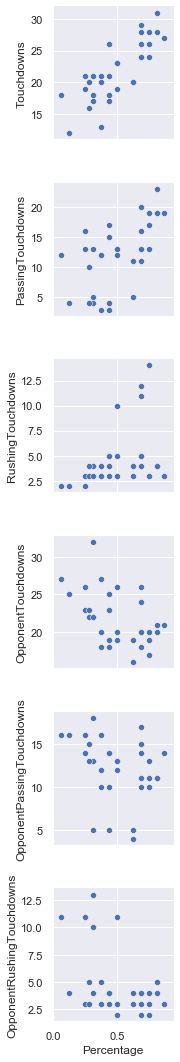

In [12]:
sns.pairplot(
    stats2020,
    x_vars=["Percentage"],
    y_vars=['Touchdowns', 'PassingTouchdowns', 'RushingTouchdowns', 'OpponentTouchdowns', 'OpponentPassingTouchdowns', 'OpponentRushingTouchdowns'],
)

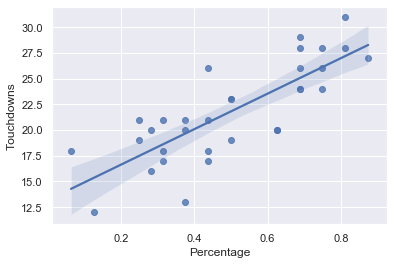

In [13]:
sns.regplot(data=stats2020, x='Percentage', y='Touchdowns') 
plt.savefig('td2020.png')


In [14]:
x = stats2020['Percentage']
x = sm.add_constant(x)
model = sm.OLS(stats2020['Touchdowns'], x).fit()    
result = model.rsquared_adj
print(result)


0.6245159671532214


/Users/blam12/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [15]:
x = stats2020['Percentage']
x = sm.add_constant(x)
model = sm.OLS(stats2020['PassingTouchdowns'], x).fit()    
result = model.rsquared_adj
print(result)


0.3025209085437549


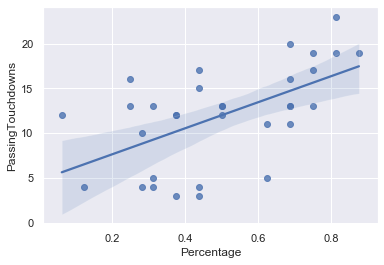

In [53]:
sns.regplot(data=stats2020, x='Percentage', y='PassingTouchdowns') 
plt.savefig('ptd.png')


In [16]:
x = stats2020['Percentage']
x = sm.add_constant(x)
model = sm.OLS(stats2020['OpponentTouchdowns'], x).fit()    
result = model.rsquared_adj
print(result)

0.21263839274574137


In [17]:
x = stats2020['Percentage']
x = sm.add_constant(x)
model = sm.OLS(stats2020['OpponentRushingTouchdowns'], x).fit()    
result = model.rsquared_adj
print(result)

0.16363116533265298


In [18]:
x = stats2020['Percentage']
x = sm.add_constant(x)
model = sm.OLS(stats2020['RushingTouchdowns'], x).fit()    
result = model.rsquared_adj
print(result)

0.12384024723837672


In [19]:
x = stats2020['Percentage']
x = sm.add_constant(x)
model = sm.OLS(stats2020['OpponentPassingTouchdowns'], x).fit()    
result = model.rsquared_adj
print(result)

0.04234239998325162


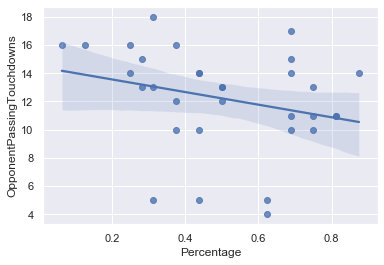

In [20]:
sns.regplot(data=stats2020, x='Percentage', y='OpponentPassingTouchdowns') 
plt.savefig('OppPTD2020.png')

# Team Stats

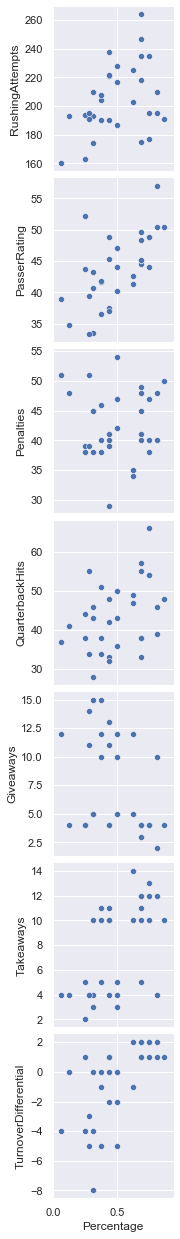

In [21]:
sns.pairplot(
    stats2020x,
    x_vars=["Percentage"],
    y_vars=["RushingAttempts", 'PasserRating', 'Penalties', 'QuarterbackHits', 'Giveaways', 'Takeaways',  'TurnoverDifferential'],
)

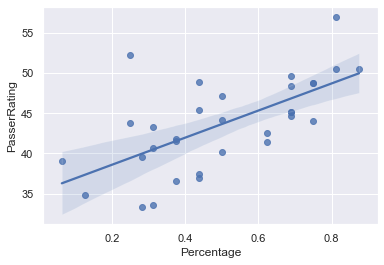

In [22]:
sns.regplot(data=stats2020, x='Percentage', y='PasserRating')
plt.savefig('PR2020.png')


In [23]:
x = stats2020['Percentage']
x = sm.add_constant(x)
model = sm.OLS(stats2020['PasserRating'], x).fit()    
result = model.rsquared_adj
print(result)


0.3946429789108159


/Users/blam12/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [24]:
x = stats2020['Percentage']
x = sm.add_constant(x)
model = sm.OLS(stats2020['TurnoverDifferential'], x).fit()    
result = model.rsquared_adj
print(result)


0.3774047167629965


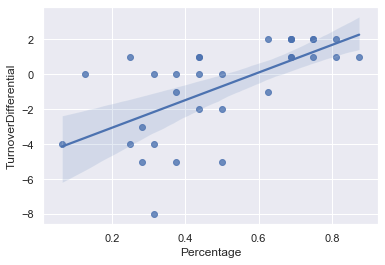

In [52]:
sns.regplot(data=stats2020, x='Percentage', y='TurnoverDifferential')
plt.savefig('Trn2020.png')


In [25]:
x = stats2020['Percentage']
x = sm.add_constant(x)
model = sm.OLS(stats2020['Takeaways'], x).fit()    
result = model.rsquared_adj
print(result)


0.31332262963069935


In [26]:
x = stats2020['Percentage']
x = sm.add_constant(x)
model = sm.OLS(stats2020['Giveaways'], x).fit()    
result = model.rsquared_adj
print(result)


0.14638024432097763


In [27]:
x = stats2020['Percentage']
x = sm.add_constant(x)
model = sm.OLS(stats2020['QuarterbackHits'], x).fit()    
result = model.rsquared_adj
print(result)


0.12356237741064557


In [28]:
x = stats2020['Percentage']
x = sm.add_constant(x)
model = sm.OLS(stats2020['RushingAttempts'], x).fit()    
result = model.rsquared_adj
print(result)


0.12167366007554936


In [29]:
x = stats2020['Percentage']
x = sm.add_constant(x)
model = sm.OLS(stats2020['Penalties'], x).fit()    
result = model.rsquared_adj
print(result)


-0.03332193982480236


# Team W/L

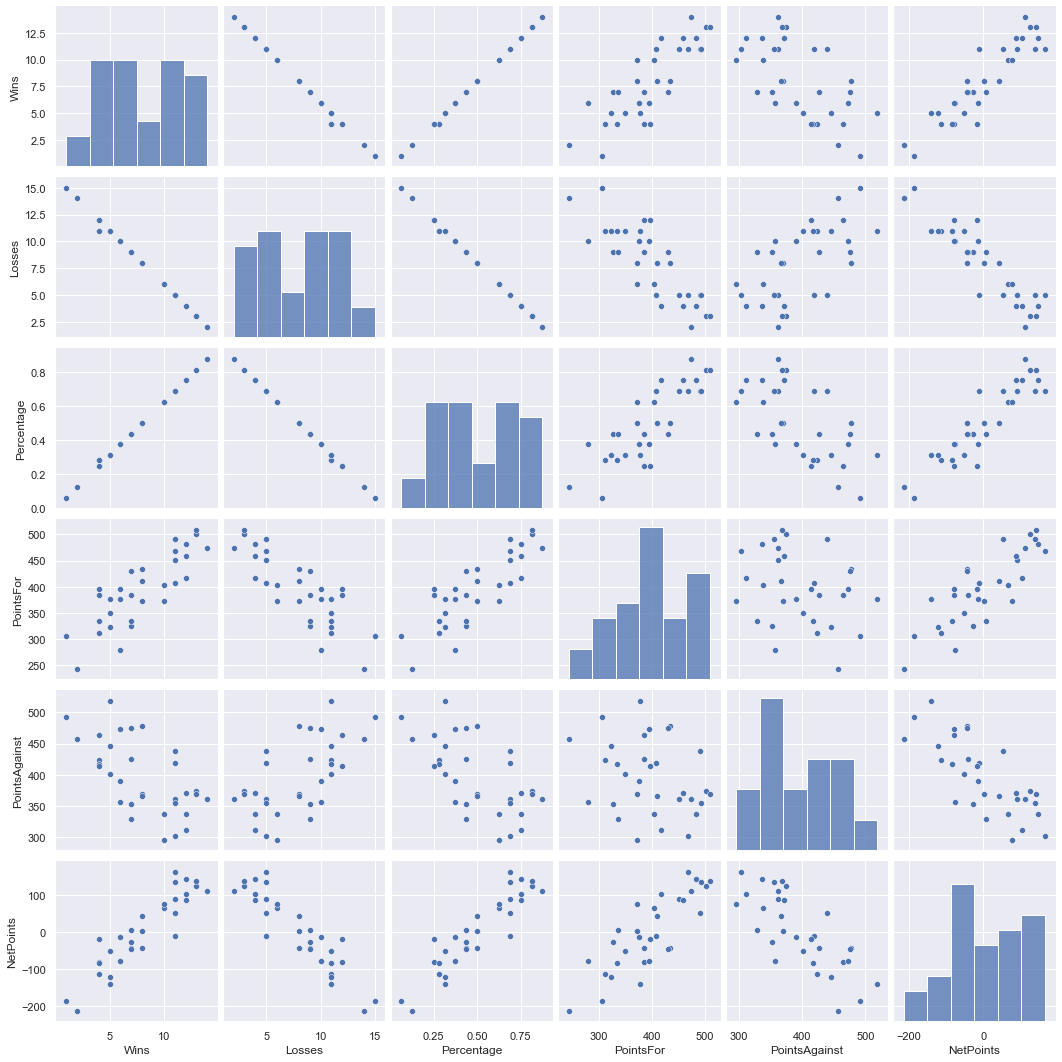

In [30]:
sns.pairplot(df_20wl)

In [31]:
df_20wl = pd.DataFrame(resp_obj, columns=["Team", 'Wins', 'Losses', 'Percentage', "PointsFor" ,"PointsAgainst" ,"NetPoints"])


In [32]:
x = stats2020['Percentage']
x = sm.add_constant(x)
model = sm.OLS(stats2020['Wins'], x).fit()    
result = model.rsquared_adj
print(result)

0.9988478923770998


/Users/blam12/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [33]:
x = stats2020['Percentage']
x = sm.add_constant(x)
model = sm.OLS(stats2020['Losses'], x).fit()    
result = model.rsquared_adj
print(result)

0.9987260918173684


In [34]:
x = stats2020['Percentage']
x = sm.add_constant(x)
model = sm.OLS(stats2020['Losses'], x).fit()    
result = model.rsquared_adj
print(result)

0.9987260918173684


In [35]:
x = stats2020['Percentage']
x = sm.add_constant(x)
model = sm.OLS(stats2020['NetPoints'], x).fit()    
result = model.rsquared_adj
print(result)

0.8345256086223327


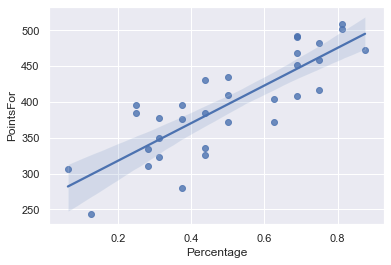

In [36]:
sns.regplot(data=stats2020, x='Percentage', y='PointsFor') 

In [37]:
x = stats2020['Percentage']
x = sm.add_constant(x)
model = sm.OLS(stats2020['PointsFor'], x).fit()    
result = model.rsquared_adj
print(result)

0.6780589714368153


/Users/blam12/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


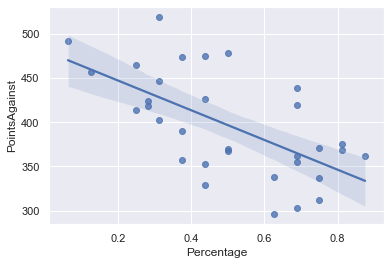

In [38]:
sns.regplot(data=stats2020, x='Percentage', y='PointsAgainst') 

In [39]:
x = stats2020['Percentage']
x = sm.add_constant(x)
model = sm.OLS(stats2020['PointsAgainst'], x).fit()    
result = model.rsquared_adj
print(result)

0.3617598408955275


/Users/blam12/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [54]:
api_prefix = "https://api.sportsdata.io/v3/nfl/scores"
cluster1 = pd.DataFrame()
headers = {'Ocp-Apim-Subscription-Key': '6b6d75c076c34e1d89c02554860f9e68'}
resp = requests.get(
    api_prefix + "/json/TeamSeasonStats/2020REG",
    params={
        "season": "2020REG"
    },headers=headers
)

resp_obj = resp.json()
cluster1 = pd.DataFrame(resp_obj, columns=["Team", 'PassingTouchdowns', 'RushingTouchdowns'])
cluster1

,Team,PassingTouchdowns,RushingTouchdowns
0,ARI,13,10
1,ATL,13,3
2,BAL,13,11
3,BUF,19,4
4,CAR,4,4
5,CHI,12,3
6,CIN,4,3
7,CLE,13,5
8,DAL,12,3
9,DEN,5,3


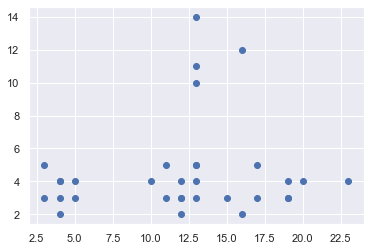

In [41]:
plt.scatter(cluster1['PassingTouchdowns'],cluster1['RushingTouchdowns'])
#plt.xlim(-180,180)
#plt.ylim(-90,90)
plt.show()

In [42]:
x = cluster1.iloc[:,1:3] # 1t for rows and second for columns
x

,PassingTouchdowns,RushingTouchdowns
0,13,10
1,13,3
2,13,11
3,19,4
4,4,4
5,12,3
6,4,3
7,13,5
8,12,3
9,5,3


In [55]:
kmeans = KMeans(4)
#means.fit(x)

In [56]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([3, 1, 3, 2, 0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 0, 1, 1, 2, 0,
       3, 0, 0, 1, 2, 2, 1, 2, 3, 0], dtype=int32)

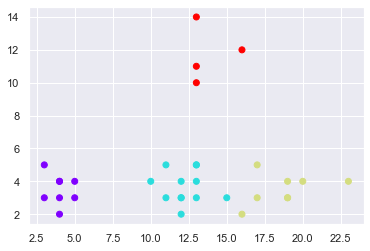

In [58]:
data_with_clusters = cluster1.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['PassingTouchdowns'],data_with_clusters['RushingTouchdowns'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.savefig('4clus.png')

# Takeaways/Giveaways

In [59]:
api_prefix = "https://api.sportsdata.io/v3/nfl/scores"
cluster1 = pd.DataFrame()
headers = {'Ocp-Apim-Subscription-Key': '6b6d75c076c34e1d89c02554860f9e68'}
resp = requests.get(
    api_prefix + "/json/TeamSeasonStats/2020REG",
    params={
        "season": "2020REG"
    },headers=headers
)

resp_obj = resp.json()
cluster2 = pd.DataFrame(resp_obj, columns=["Team", 'Takeaways', 'Giveaways'])
cluster2

,Team,Takeaways,Giveaways
0,ARI,5,5
1,ATL,5,4
2,BAL,10,4
3,BUF,12,10
4,CAR,10,5
5,CHI,4,10
6,CIN,4,11
7,CLE,5,4
8,DAL,11,12
9,DEN,4,15


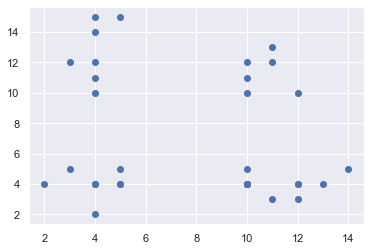

In [61]:
plt.scatter(cluster2['Takeaways'],cluster2['Giveaways'])
#plt.xlim(-180,180)
#plt.ylim(-90,90)
plt.show()

In [63]:
x = cluster2.iloc[:,1:3] # 1t for rows and second for columns
x

,Takeaways,Giveaways
0,5,5
1,5,4
2,10,4
3,12,10
4,10,5
5,4,10
6,4,11
7,5,4
8,11,12
9,4,15


In [73]:
kmeans = KMeans(4)
#means.fit(x)

In [74]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 2, 0, 2, 3, 3, 1, 0, 3, 1, 1, 1, 2, 3, 2, 1, 0, 3, 2, 0, 2,
       2, 0, 1, 3, 2, 2, 3, 2, 2, 0], dtype=int32)

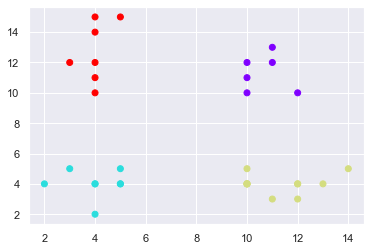

In [76]:
data_with_clusters = cluster2.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Takeaways'],data_with_clusters['Giveaways'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.savefig('4clust.png')